# SGDClassifier implementation

Frist I have loaded locally the preprocessed dataset so that it is ready for implementation

In [1]:
from google.colab import files
uploaded = files.upload()

Saving preprocessed_dataset.csv to preprocessed_dataset.csv


Applying smote and balancing the dataset. We applied Smote to the training data to balance the class distribution by generating synthetic samples for the minority class.

In [7]:
!pip install imbalanced-learn --quiet

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

df = pd.read_csv("preprocessed_dataset.csv")
df = df.sample(n=10000, random_state=42)

target_column = 'No-show'
X = df.drop(columns=[target_column])
y = df[target_column]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


Now we start with the different hyperparameters of SVM which we will adjust and test to optimize the model's performance

Test #1


loss= log_loss | Alpha= 0.0001 | penalty=l2 | Learning Rate=constant

Confusion Matrix:
 [[1071  524]
 [ 200  205]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.67      0.75      1595
           1       0.28      0.51      0.36       405

    accuracy                           0.64      2000
   macro avg       0.56      0.59      0.55      2000
weighted avg       0.73      0.64      0.67      2000

Accuracy: 0.638


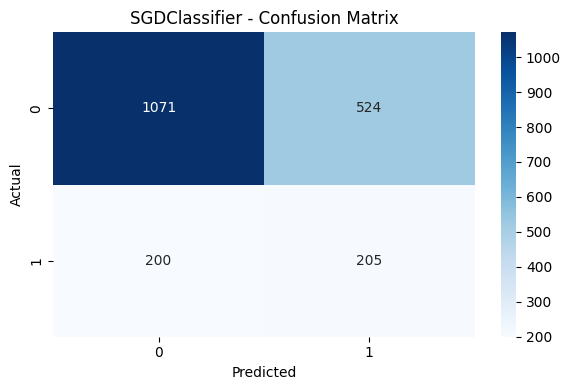

<ipython-input-4-b0f16b432433>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='pastel')


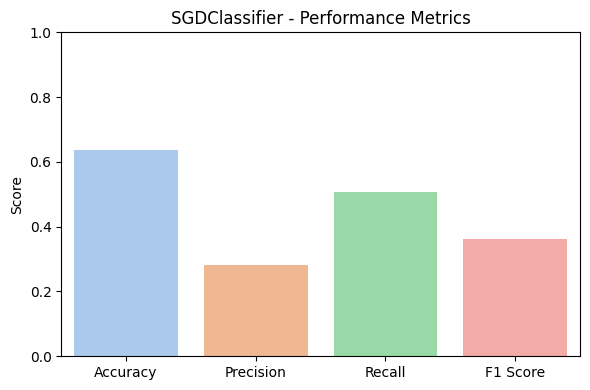

In [4]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import warnings

from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

results_file = "experiment_results.xlsx"
new_result = pd.DataFrame([{
    "Run": 1,
    "Model": "SGDClassifier",
    "Accuracy": acc,
    "Precision": prec,
    "Recall": rec,
    "F1 Score": f1
}])

if os.path.exists(results_file):
    existing = pd.read_excel(results_file)
    final_df = pd.concat([existing, new_result], ignore_index=True)
else:
    final_df = new_result

final_df.to_excel(results_file, index=False)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy: {:.3f}".format(acc))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('SGDClassifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

metrics = {'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1 Score': f1}
plt.figure(figsize=(6, 4))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='pastel')
plt.ylim(0, 1)
plt.title('SGDClassifier - Performance Metrics')
plt.ylabel('Score')
plt.tight_layout()
plt.show()


Test #2

loss= hinge | Alpha= 0.001 | penalty=l1 | Learning Rate=optimal

Confusion Matrix:
 [[1064  531]
 [ 166  239]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.67      0.75      1595
           1       0.31      0.59      0.41       405

    accuracy                           0.65      2000
   macro avg       0.59      0.63      0.58      2000
weighted avg       0.75      0.65      0.68      2000

Accuracy: 0.651


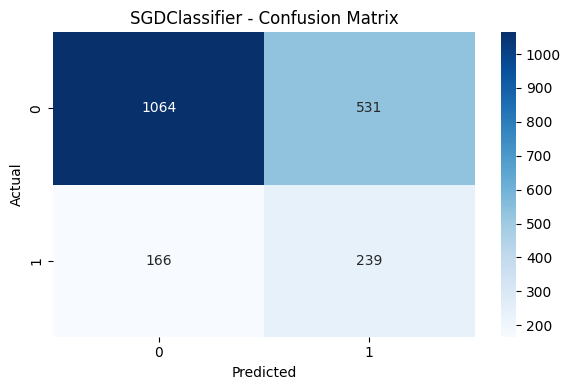

<ipython-input-5-cc5e144531f3>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='pastel')


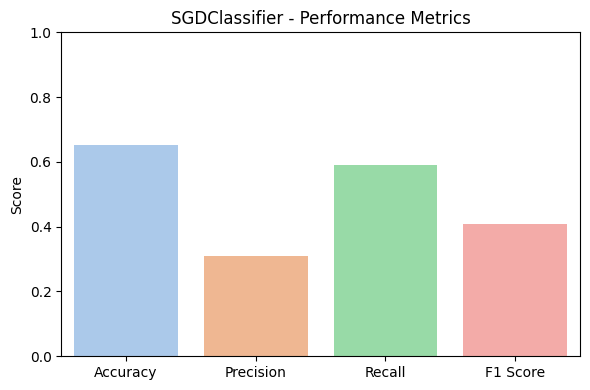

In [5]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SGDClassifier(
    loss='hinge',
    alpha=0.001,
    penalty='l1',
    learning_rate='optimal',
    max_iter=1000,
    tol=1e-3,
    random_state=42
)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

results_file = "experiment_results.xlsx"
new_result = pd.DataFrame([{
    "Run": 2,
    "Model": "SGDClassifier",
    "Accuracy": acc,
    "Precision": prec,
    "Recall": rec,
    "F1 Score": f1
}])
if os.path.exists(results_file):
    existing = pd.read_excel(results_file)
    final_df = pd.concat([existing, new_result], ignore_index=True)
else:
    final_df = new_result
final_df.to_excel(results_file, index=False)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy: {:.3f}".format(acc))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('SGDClassifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

metrics = {'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1 Score': f1}
plt.figure(figsize=(6, 4))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='pastel')
plt.ylim(0, 1)
plt.title('SGDClassifier - Performance Metrics')
plt.ylabel('Score')
plt.tight_layout()
plt.show()


Test #3

loss= modified_huber	 | Alpha= 0.01 | penalty=elasticnet | Learning Rate=invscaling

Confusion Matrix:
 [[1062  533]
 [ 160  245]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.67      0.75      1595
           1       0.31      0.60      0.41       405

    accuracy                           0.65      2000
   macro avg       0.59      0.64      0.58      2000
weighted avg       0.76      0.65      0.69      2000

Accuracy: 0.653


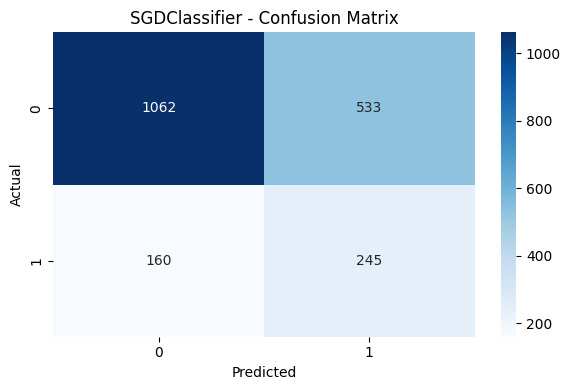

<ipython-input-9-45df2c1118f6>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='pastel')


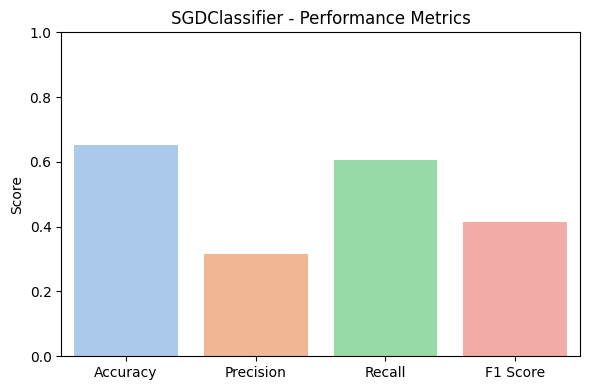

In [9]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SGDClassifier(
    loss='modified_huber',
    alpha=0.01,
    penalty='elasticnet',
    learning_rate='invscaling',
    eta0=0.1,
    max_iter=1000,
    tol=1e-3,
    random_state=42
)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

results_file = "experiment_results.xlsx"
new_result = pd.DataFrame([{
    "Run": 3,
    "Model": "SGDClassifier",
    "Accuracy": acc,
    "Precision": prec,
    "Recall": rec,
    "F1 Score": f1
}])
if os.path.exists(results_file):
    existing = pd.read_excel(results_file)
    final_df = pd.concat([existing, new_result], ignore_index=True)
else:
    final_df = new_result
final_df.to_excel(results_file, index=False)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy: {:.3f}".format(acc))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('SGDClassifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

metrics = {'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1 Score': f1}
plt.figure(figsize=(6, 4))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='pastel')
plt.ylim(0, 1)
plt.title('SGDClassifier - Performance Metrics')
plt.ylabel('Score')
plt.tight_layout()
plt.show()


Test #4

loss= log_loss | Alpha= 0.1 | penalty=l2 | Learning Rate=adaptive

Confusion Matrix:
 [[1040  555]
 [ 154  251]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.65      0.75      1595
           1       0.31      0.62      0.41       405

    accuracy                           0.65      2000
   macro avg       0.59      0.64      0.58      2000
weighted avg       0.76      0.65      0.68      2000

Accuracy: 0.645


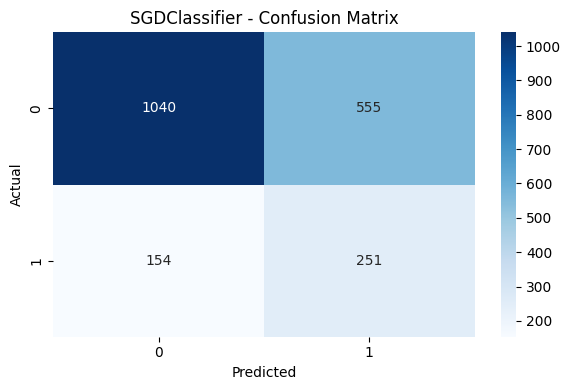

<ipython-input-13-f5f988f6ca87>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='pastel')


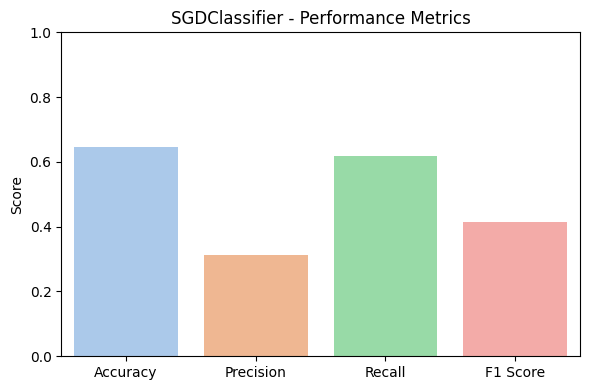

In [13]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SGDClassifier(
    loss='log_loss',
    alpha=0.1,
    penalty='l2',
    learning_rate='adaptive',
    eta0=0.1,
    max_iter=1000,
    tol=1e-3,
    random_state=42
)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

results_file = "experiment_results.xlsx"
new_result = pd.DataFrame([{
    "Run": 4,
    "Model": "SGDClassifier",
    "Accuracy": acc,
    "Precision": prec,
    "Recall": rec,
    "F1 Score": f1
}])
if os.path.exists(results_file):
    existing = pd.read_excel(results_file)
    final_df = pd.concat([existing, new_result], ignore_index=True)
else:
    final_df = new_result
final_df.to_excel(results_file, index=False)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy: {:.3f}".format(acc))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('SGDClassifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

metrics = {'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1 Score': f1}
plt.figure(figsize=(6, 4))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='pastel')
plt.ylim(0, 1)
plt.title('SGDClassifier - Performance Metrics')
plt.ylabel('Score')
plt.tight_layout()
plt.show()



Test #5

loss= hinge | Alpha= 	0.0001 | penalty=l1 | Learning Rate=constant

Confusion Matrix:
 [[1260  335]
 [ 262  143]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81      1595
           1       0.30      0.35      0.32       405

    accuracy                           0.70      2000
   macro avg       0.56      0.57      0.57      2000
weighted avg       0.72      0.70      0.71      2000

Accuracy: 0.702


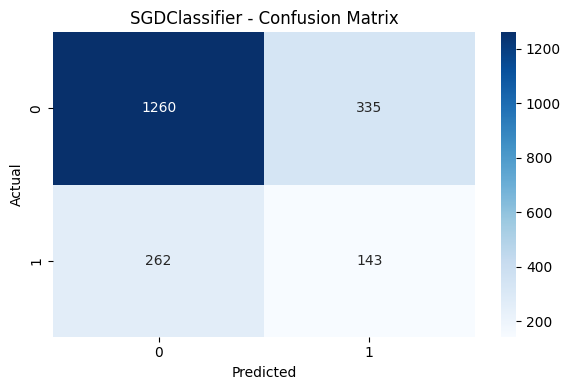

<ipython-input-14-1ef0b3f47f00>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='pastel')


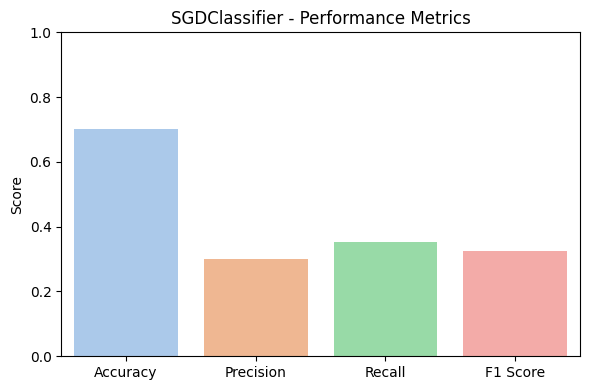

In [14]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SGDClassifier(
    loss='hinge',
    alpha=0.0001,
    penalty='l1',
    learning_rate='constant',
    eta0=0.1,
    max_iter=1000,
    tol=1e-3,
    random_state=42
)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

results_file = "experiment_results.xlsx"
new_result = pd.DataFrame([{
    "Run": 5,
    "Model": "SGDClassifier",
    "Accuracy": acc,
    "Precision": prec,
    "Recall": rec,
    "F1 Score": f1
}])
if os.path.exists(results_file):
    existing = pd.read_excel(results_file)
    final_df = pd.concat([existing, new_result], ignore_index=True)
else:
    final_df = new_result
final_df.to_excel(results_file, index=False)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy: {:.3f}".format(acc))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('SGDClassifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

metrics = {'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1 Score': f1}
plt.figure(figsize=(6, 4))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='pastel')
plt.ylim(0, 1)
plt.title('SGDClassifier - Performance Metrics')
plt.ylabel('Score')
plt.tight_layout()
plt.show()


Test #6

loss= modified_huber | Alpha= 	0.001 | penalty=l2 | Learning Rate=optimal

Confusion Matrix:
 [[1071  524]
 [ 199  206]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.67      0.75      1595
           1       0.28      0.51      0.36       405

    accuracy                           0.64      2000
   macro avg       0.56      0.59      0.56      2000
weighted avg       0.73      0.64      0.67      2000

Accuracy: 0.638


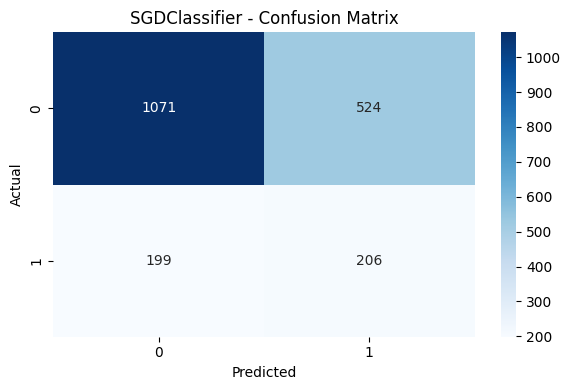

<ipython-input-15-07f05c86e9c3>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='pastel')


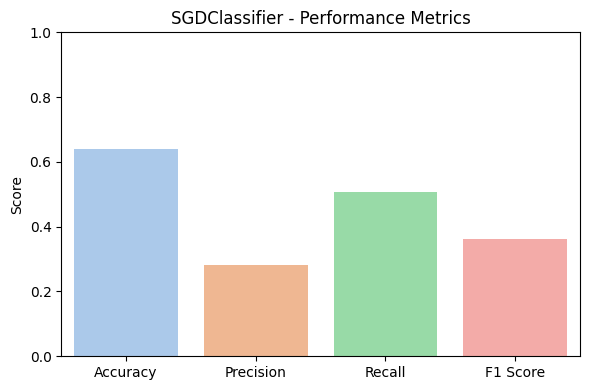

In [15]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SGDClassifier(
    loss='modified_huber',
    alpha=0.001,
    penalty='l2',
    learning_rate='optimal',
    max_iter=1000,
    tol=1e-3,
    random_state=42
)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

results_file = "experiment_results.xlsx"
new_result = pd.DataFrame([{
    "Run": 6,
    "Model": "SGDClassifier",
    "Accuracy": acc,
    "Precision": prec,
    "Recall": rec,
    "F1 Score": f1
}])
if os.path.exists(results_file):
    existing = pd.read_excel(results_file)
    final_df = pd.concat([existing, new_result], ignore_index=True)
else:
    final_df = new_result
final_df.to_excel(results_file, index=False)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy: {:.3f}".format(acc))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('SGDClassifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

metrics = {'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1 Score': f1}
plt.figure(figsize=(6, 4))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='pastel')
plt.ylim(0, 1)
plt.title('SGDClassifier - Performance Metrics')
plt.ylabel('Score')
plt.tight_layout()
plt.show()


Test #7

loss= log_loss | Alpha= 0.01 | penalty=elasticnet | Learning Rate=invscaling

Confusion Matrix:
 [[1056  539]
 [ 155  250]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.66      0.75      1595
           1       0.32      0.62      0.42       405

    accuracy                           0.65      2000
   macro avg       0.59      0.64      0.59      2000
weighted avg       0.76      0.65      0.69      2000

Accuracy: 0.653


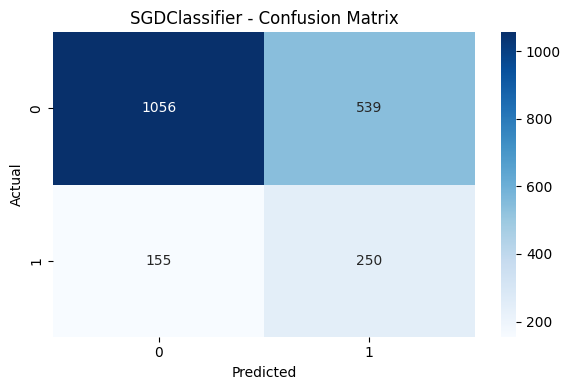

<ipython-input-17-55ec3f9877ca>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='pastel')


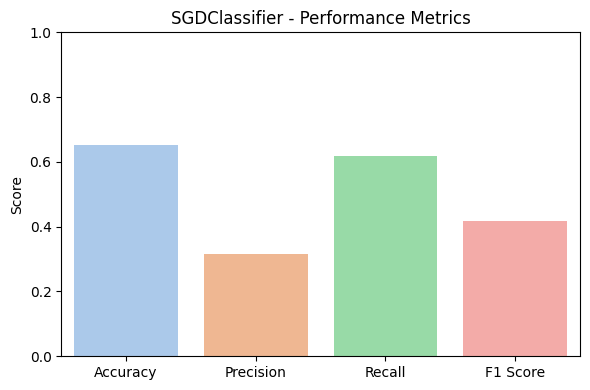

In [17]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SGDClassifier(
    loss='log_loss',
    alpha=0.01,
    penalty='elasticnet',
    learning_rate='invscaling',
    max_iter=1000,
     eta0=0.1,
    tol=1e-3,
    random_state=42
)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

results_file = "experiment_results.xlsx"
new_result = pd.DataFrame([{
    "Run": 7,
    "Model": "SGDClassifier",
    "Accuracy": acc,
    "Precision": prec,
    "Recall": rec,
    "F1 Score": f1
}])
if os.path.exists(results_file):
    existing = pd.read_excel(results_file)
    final_df = pd.concat([existing, new_result], ignore_index=True)
else:
    final_df = new_result
final_df.to_excel(results_file, index=False)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy: {:.3f}".format(acc))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('SGDClassifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

metrics = {'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1 Score': f1}
plt.figure(figsize=(6, 4))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='pastel')
plt.ylim(0, 1)
plt.title('SGDClassifier - Performance Metrics')
plt.ylabel('Score')
plt.tight_layout()
plt.show()


Test #8

loss= hinge | Alpha= 0.1 | penalty=l1 | Learning Rate=adaptive

Confusion Matrix:
 [[1345  250]
 [ 292  113]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1595
           1       0.31      0.28      0.29       405

    accuracy                           0.73      2000
   macro avg       0.57      0.56      0.56      2000
weighted avg       0.72      0.73      0.72      2000

Accuracy: 0.729


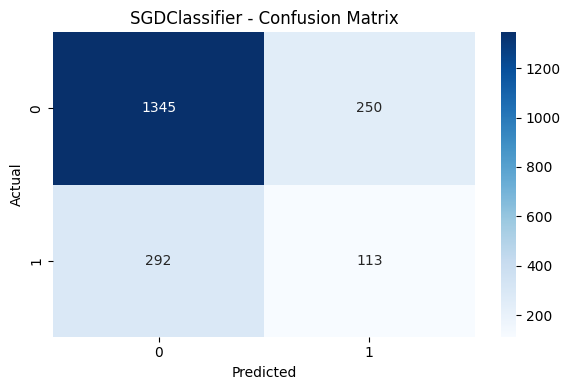

<ipython-input-18-b33241b4117d>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='pastel')


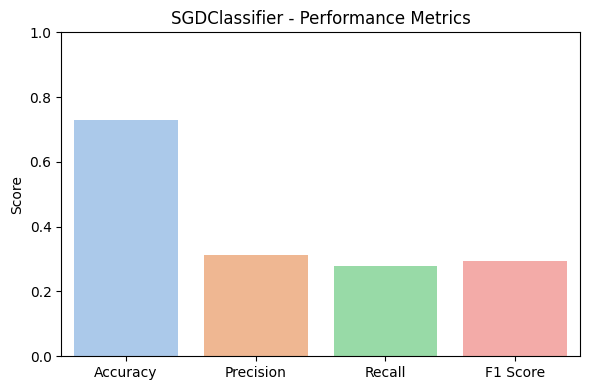

In [18]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SGDClassifier(
    loss='hinge',
    alpha=0.1,
    penalty='l1',
    learning_rate='adaptive',
    eta0=0.1,
    max_iter=1000,
    tol=1e-3,
    random_state=42
)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

results_file = "experiment_results.xlsx"
new_result = pd.DataFrame([{
    "Run": 8,
    "Model": "SGDClassifier",
    "Accuracy": acc,
    "Precision": prec,
    "Recall": rec,
    "F1 Score": f1
}])
if os.path.exists(results_file):
    existing = pd.read_excel(results_file)
    final_df = pd.concat([existing, new_result], ignore_index=True)
else:
    final_df = new_result
final_df.to_excel(results_file, index=False)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy: {:.3f}".format(acc))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('SGDClassifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

metrics = {'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1 Score': f1}
plt.figure(figsize=(6, 4))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='pastel')
plt.ylim(0, 1)
plt.title('SGDClassifier - Performance Metrics')
plt.ylabel('Score')
plt.tight_layout()
plt.show()


Test #9

loss= modified_huber	 | Alpha=	0.0001 | penalty=elasticnet | Learning Rate=constant

Confusion Matrix:
 [[865 730]
 [188 217]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.54      0.65      1595
           1       0.23      0.54      0.32       405

    accuracy                           0.54      2000
   macro avg       0.53      0.54      0.49      2000
weighted avg       0.70      0.54      0.59      2000

Accuracy: 0.541


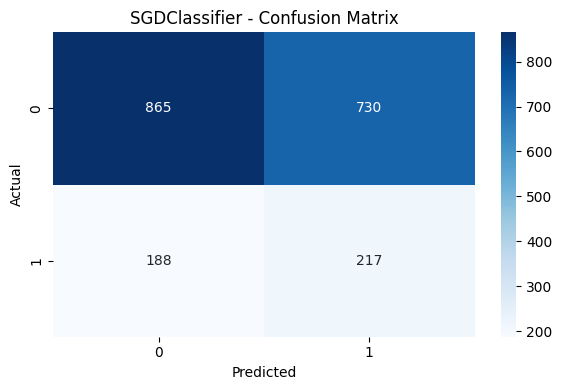

<ipython-input-19-6d83a27993f9>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='pastel')


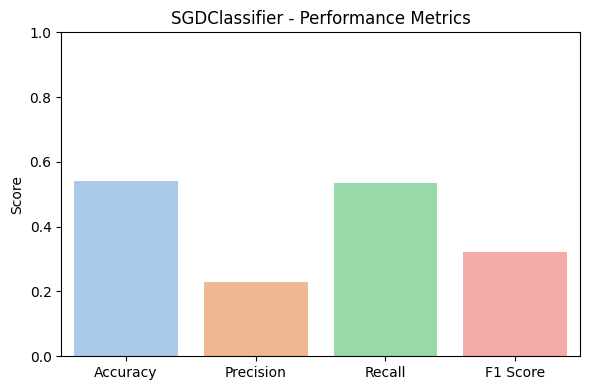

In [19]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SGDClassifier(
    loss='modified_huber',
    alpha=0.0001,
    penalty='elasticnet',
    learning_rate='constant',
    eta0=0.1,
    max_iter=1000,
    tol=1e-3,
    random_state=42
)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

results_file = "experiment_results.xlsx"
new_result = pd.DataFrame([{
    "Run": 9,
    "Model": "SGDClassifier",
    "Accuracy": acc,
    "Precision": prec,
    "Recall": rec,
    "F1 Score": f1
}])
if os.path.exists(results_file):
    existing = pd.read_excel(results_file)
    final_df = pd.concat([existing, new_result], ignore_index=True)
else:
    final_df = new_result
final_df.to_excel(results_file, index=False)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy: {:.3f}".format(acc))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('SGDClassifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

metrics = {'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1 Score': f1}
plt.figure(figsize=(6, 4))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='pastel')
plt.ylim(0, 1)
plt.title('SGDClassifier - Performance Metrics')
plt.ylabel('Score')
plt.tight_layout()
plt.show()


Test #10

loss= log_loss | Alpha= 0.001 | penalty=l1 | Learning Rate=optimal

Confusion Matrix:
 [[1038  557]
 [ 152  253]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.65      0.75      1595
           1       0.31      0.62      0.42       405

    accuracy                           0.65      2000
   macro avg       0.59      0.64      0.58      2000
weighted avg       0.76      0.65      0.68      2000

Accuracy: 0.645


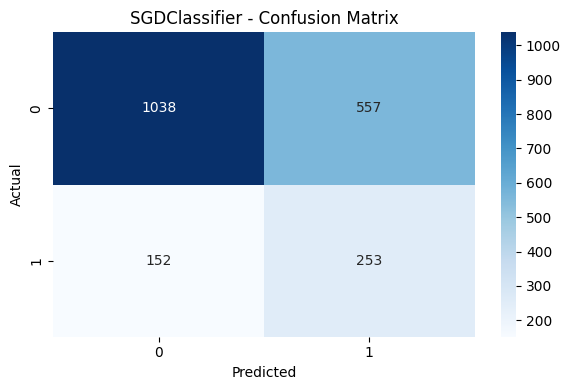

<ipython-input-20-7e1703a6f1db>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='pastel')


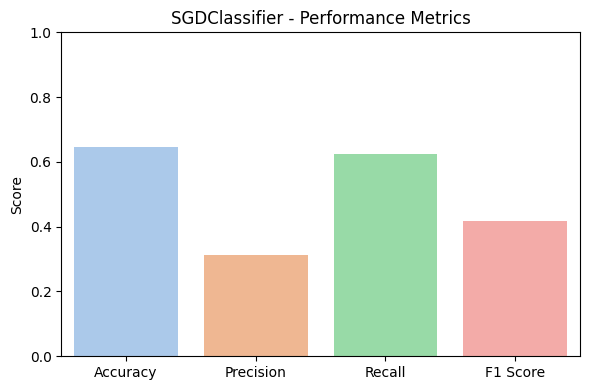

In [20]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SGDClassifier(
    loss='log_loss',
    alpha=0.001,
    penalty='l1',
    learning_rate='optimal',
    max_iter=1000,
    tol=1e-3,
    random_state=42
)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

results_file = "experiment_results.xlsx"
new_result = pd.DataFrame([{
    "Run": 10,
    "Model": "SGDClassifier",
    "Accuracy": acc,
    "Precision": prec,
    "Recall": rec,
    "F1 Score": f1
}])
if os.path.exists(results_file):
    existing = pd.read_excel(results_file)
    final_df = pd.concat([existing, new_result], ignore_index=True)
else:
    final_df = new_result
final_df.to_excel(results_file, index=False)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy: {:.3f}".format(acc))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('SGDClassifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

metrics = {'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1 Score': f1}
plt.figure(figsize=(6, 4))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='pastel')
plt.ylim(0, 1)
plt.title('SGDClassifier - Performance Metrics')
plt.ylabel('Score')
plt.tight_layout()
plt.show()


Test #11

loss= hinge | Alpha= 0.001 | penalty=l2 | Learning Rate=invscaling

Confusion Matrix:
 [[1059  536]
 [ 161  244]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.66      0.75      1595
           1       0.31      0.60      0.41       405

    accuracy                           0.65      2000
   macro avg       0.59      0.63      0.58      2000
weighted avg       0.76      0.65      0.68      2000

Accuracy: 0.651


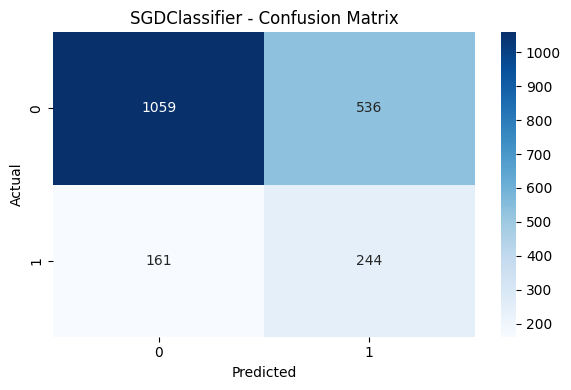

<ipython-input-22-877357eea0c7>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='pastel')


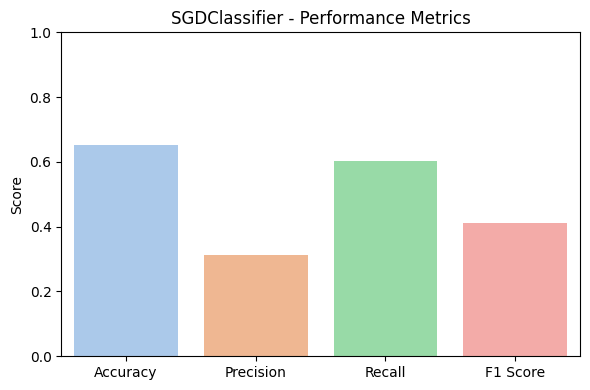

In [22]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SGDClassifier(
    loss='hinge',
    alpha=0.001,
    penalty='l2',
    learning_rate='invscaling',
    max_iter=1000,
     eta0=0.1,
    tol=1e-3,
    random_state=42
)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

results_file = "experiment_results.xlsx"
new_result = pd.DataFrame([{
    "Run": 11,
    "Model": "SGDClassifier",
    "Accuracy": acc,
    "Precision": prec,
    "Recall": rec,
    "F1 Score": f1
}])
if os.path.exists(results_file):
    existing = pd.read_excel(results_file)
    final_df = pd.concat([existing, new_result], ignore_index=True)
else:
    final_df = new_result
final_df.to_excel(results_file, index=False)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy: {:.3f}".format(acc))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('SGDClassifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

metrics = {'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1 Score': f1}
plt.figure(figsize=(6, 4))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='pastel')
plt.ylim(0, 1)
plt.title('SGDClassifier - Performance Metrics')
plt.ylabel('Score')
plt.tight_layout()
plt.show()


Test #12

loss= modified_huber | Alpha= 0.01 | penalty=l1 | Learning Rate=adaptive

Confusion Matrix:
 [[1042  553]
 [ 156  249]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.65      0.75      1595
           1       0.31      0.61      0.41       405

    accuracy                           0.65      2000
   macro avg       0.59      0.63      0.58      2000
weighted avg       0.76      0.65      0.68      2000

Accuracy: 0.645


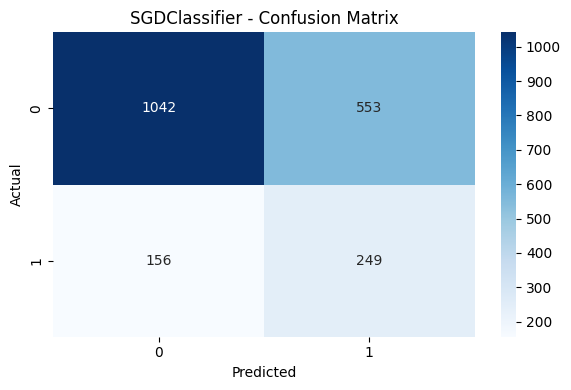

<ipython-input-24-629b96421b24>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='pastel')


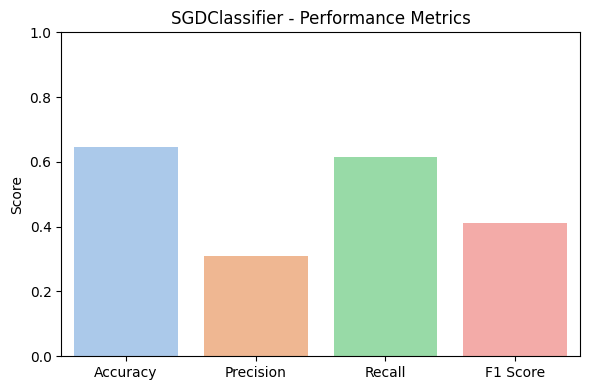

In [24]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SGDClassifier(
    loss='modified_huber',
    alpha=0.01,
    penalty='l1',
    learning_rate='adaptive',
    max_iter=1000,
        eta0=0.3,
    tol=1e-3,
    random_state=42
)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

results_file = "experiment_results.xlsx"
new_result = pd.DataFrame([{
    "Run": 12,
    "Model": "SGDClassifier",
    "Accuracy": acc,
    "Precision": prec,
    "Recall": rec,
    "F1 Score": f1
}])
if os.path.exists(results_file):
    existing = pd.read_excel(results_file)
    final_df = pd.concat([existing, new_result], ignore_index=True)
else:
    final_df = new_result
final_df.to_excel(results_file, index=False)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy: {:.3f}".format(acc))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('SGDClassifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

metrics = {'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1 Score': f1}
plt.figure(figsize=(6, 4))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='pastel')
plt.ylim(0, 1)
plt.title('SGDClassifier - Performance Metrics')
plt.ylabel('Score')
plt.tight_layout()
plt.show()


Test #13

loss= log_loss | Alpha= 0.0001 | penalty=elasticnet | Learning Rate=constant

Confusion Matrix:
 [[1295  300]
 [ 276  129]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.82      1595
           1       0.30      0.32      0.31       405

    accuracy                           0.71      2000
   macro avg       0.56      0.57      0.56      2000
weighted avg       0.72      0.71      0.72      2000

Accuracy: 0.712


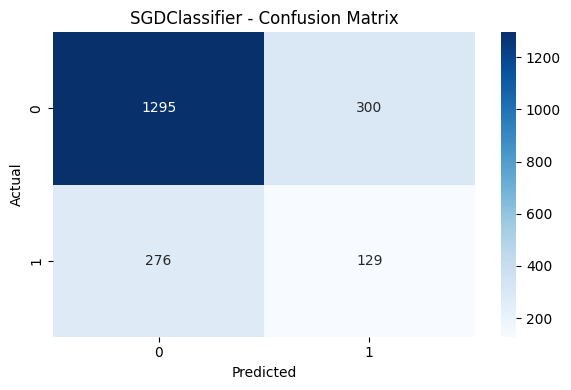

<ipython-input-25-295ced05d514>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='pastel')


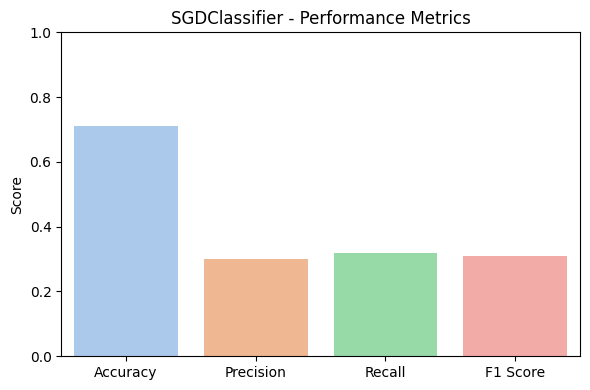

In [25]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SGDClassifier(
    loss='log_loss',
    alpha=0.0001,
    penalty='elasticnet',
    learning_rate='constant',
    eta0=0.1,
    max_iter=1000,
    tol=1e-3,
    random_state=42
)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

results_file = "experiment_results.xlsx"
new_result = pd.DataFrame([{
    "Run": 13,
    "Model": "SGDClassifier",
    "Accuracy": acc,
    "Precision": prec,
    "Recall": rec,
    "F1 Score": f1
}])
if os.path.exists(results_file):
    existing = pd.read_excel(results_file)
    final_df = pd.concat([existing, new_result], ignore_index=True)
else:
    final_df = new_result
final_df.to_excel(results_file, index=False)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy: {:.3f}".format(acc))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('SGDClassifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

metrics = {'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1 Score': f1}
plt.figure(figsize=(6, 4))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='pastel')
plt.ylim(0, 1)
plt.title('SGDClassifier - Performance Metrics')
plt.ylabel('Score')
plt.tight_layout()
plt.show()


Test #14

loss= hinge | Alpha= 0.001 | penalty=elasticnet | Learning Rate=optimal

Confusion Matrix:
 [[1043  552]
 [ 161  244]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.65      0.75      1595
           1       0.31      0.60      0.41       405

    accuracy                           0.64      2000
   macro avg       0.59      0.63      0.58      2000
weighted avg       0.75      0.64      0.68      2000

Accuracy: 0.643


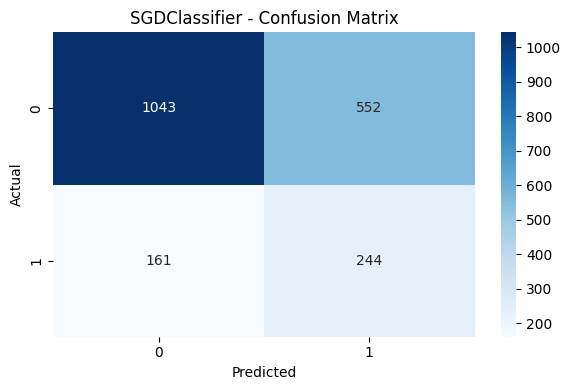

<ipython-input-26-ea9e613cf29b>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='pastel')


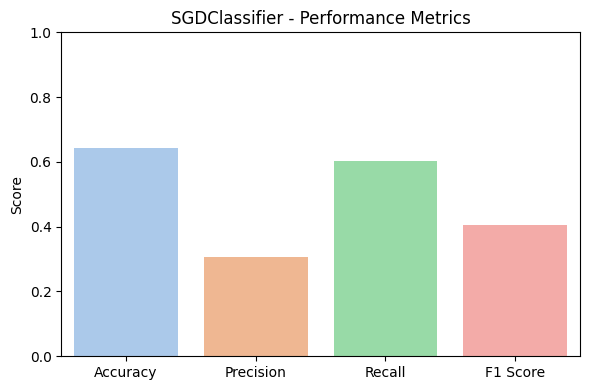

In [26]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SGDClassifier(
    loss='hinge',
    alpha=0.001,
    penalty='elasticnet',
    learning_rate='optimal',
    max_iter=1000,
    tol=1e-3,
    random_state=42
)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

results_file = "experiment_results.xlsx"
new_result = pd.DataFrame([{
    "Run": 14,
    "Model": "SGDClassifier",
    "Accuracy": acc,
    "Precision": prec,
    "Recall": rec,
    "F1 Score": f1
}])
if os.path.exists(results_file):
    existing = pd.read_excel(results_file)
    final_df = pd.concat([existing, new_result], ignore_index=True)
else:
    final_df = new_result
final_df.to_excel(results_file, index=False)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy: {:.3f}".format(acc))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('SGDClassifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

metrics = {'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1 Score': f1}
plt.figure(figsize=(6, 4))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='pastel')
plt.ylim(0, 1)
plt.title('SGDClassifier - Performance Metrics')
plt.ylabel('Score')
plt.tight_layout()
plt.show()


Test #15

loss= modified_huber | Alpha= 0.01 | penalty=l1 | Learning Rate=invscaling

Confusion Matrix:
 [[1092  503]
 [ 186  219]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.68      0.76      1595
           1       0.30      0.54      0.39       405

    accuracy                           0.66      2000
   macro avg       0.58      0.61      0.57      2000
weighted avg       0.74      0.66      0.68      2000

Accuracy: 0.655


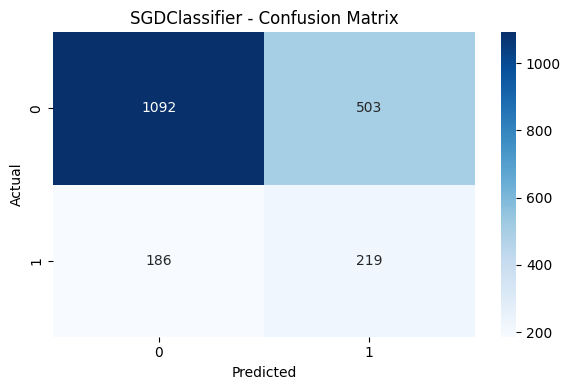

<ipython-input-28-35885c467630>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='pastel')


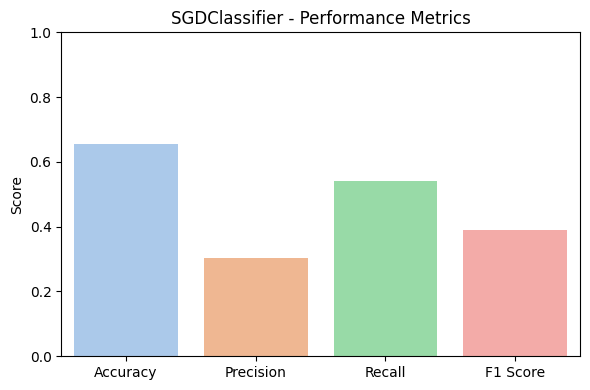

In [28]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SGDClassifier(
    loss='modified_huber',
    alpha=0.01,
    penalty='l1',
    learning_rate='invscaling',
    max_iter=1000,
     eta0=0.5,
    tol=1e-3,
    random_state=42
)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

results_file = "experiment_results.xlsx"
new_result = pd.DataFrame([{
    "Run": 15,
    "Model": "SGDClassifier",
    "Accuracy": acc,
    "Precision": prec,
    "Recall": rec,
    "F1 Score": f1
}])
if os.path.exists(results_file):
    existing = pd.read_excel(results_file)
    final_df = pd.concat([existing, new_result], ignore_index=True)
else:
    final_df = new_result
final_df.to_excel(results_file, index=False)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy: {:.3f}".format(acc))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('SGDClassifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

metrics = {'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1 Score': f1}
plt.figure(figsize=(6, 4))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='pastel')
plt.ylim(0, 1)
plt.title('SGDClassifier - Performance Metrics')
plt.ylabel('Score')
plt.tight_layout()
plt.show()


Test #16

loss= log_loss | Alpha= 0.1 | penalty=l1 | Learning Rate=adaptive

Confusion Matrix:
 [[1595    0]
 [ 405    0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1595
           1       0.00      0.00      0.00       405

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000

Accuracy: 0.797


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


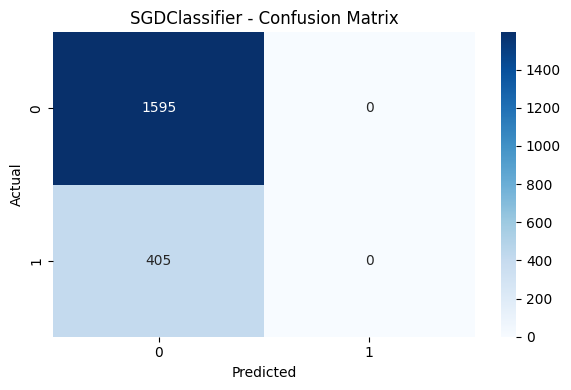

<ipython-input-30-e628c7efe0c0>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='pastel')


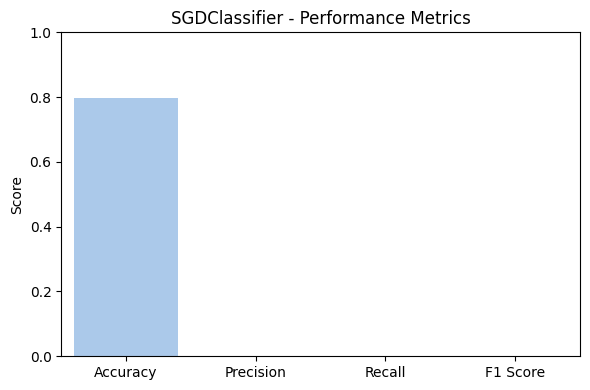

In [30]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SGDClassifier(
    loss='log_loss',
    alpha=0.1,
    penalty='l1',
    learning_rate='adaptive',
    max_iter=1000,
    eta0=0.8,
    tol=1e-3,
    random_state=42
)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

results_file = "experiment_results.xlsx"
new_result = pd.DataFrame([{
    "Run": 16,
    "Model": "SGDClassifier",
    "Accuracy": acc,
    "Precision": prec,
    "Recall": rec,
    "F1 Score": f1
}])
if os.path.exists(results_file):
    existing = pd.read_excel(results_file)
    final_df = pd.concat([existing, new_result], ignore_index=True)
else:
    final_df = new_result
final_df.to_excel(results_file, index=False)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy: {:.3f}".format(acc))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('SGDClassifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

metrics = {'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1 Score': f1}
plt.figure(figsize=(6, 4))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='pastel')
plt.ylim(0, 1)
plt.title('SGDClassifier - Performance Metrics')
plt.ylabel('Score')
plt.tight_layout()
plt.show()


Test #17

loss= hinge | Alpha= 0.0001 | penalty=l2 | Learning Rate=constant

Confusion Matrix:
 [[779 816]
 [160 245]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.49      0.61      1595
           1       0.23      0.60      0.33       405

    accuracy                           0.51      2000
   macro avg       0.53      0.55      0.47      2000
weighted avg       0.71      0.51      0.56      2000

Accuracy: 0.512


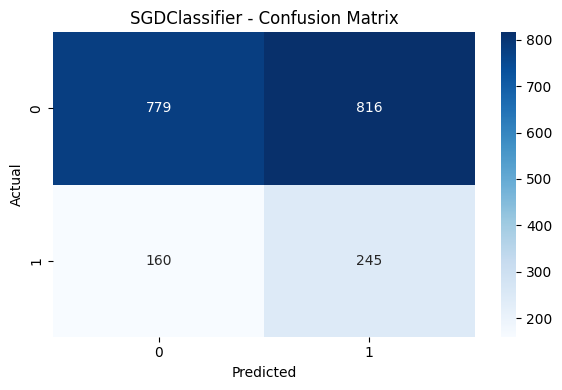

<ipython-input-32-d64e4f6dea4f>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='pastel')


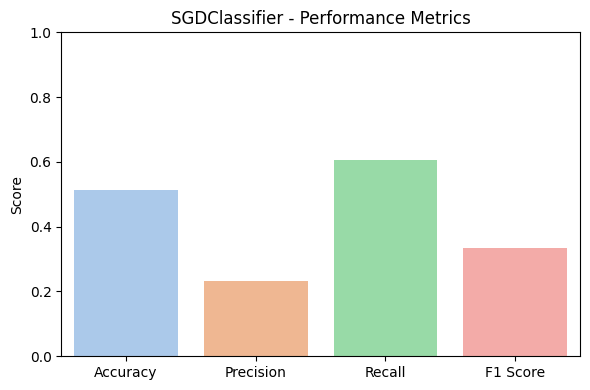

In [32]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SGDClassifier(
    loss='hinge',
    alpha=0.0001,
    penalty='l2',
    learning_rate='constant',
    max_iter=1000,
    eta0=0.2,
    tol=1e-3,
    random_state=42
)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

results_file = "experiment_results.xlsx"
new_result = pd.DataFrame([{
    "Run": 17,
    "Model": "SGDClassifier",
    "Accuracy": acc,
    "Precision": prec,
    "Recall": rec,
    "F1 Score": f1
}])
if os.path.exists(results_file):
    existing = pd.read_excel(results_file)
    final_df = pd.concat([existing, new_result], ignore_index=True)
else:
    final_df = new_result
final_df.to_excel(results_file, index=False)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy: {:.3f}".format(acc))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('SGDClassifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

metrics = {'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1 Score': f1}
plt.figure(figsize=(6, 4))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='pastel')
plt.ylim(0, 1)
plt.title('SGDClassifier - Performance Metrics')
plt.ylabel('Score')
plt.tight_layout()
plt.show()


Test #18

loss= modified_huber | Alpha= 0.001 | penalty=elascinet | Learning Rate=optimal

Confusion Matrix:
 [[1041  554]
 [ 193  212]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.65      0.74      1595
           1       0.28      0.52      0.36       405

    accuracy                           0.63      2000
   macro avg       0.56      0.59      0.55      2000
weighted avg       0.73      0.63      0.66      2000

Accuracy: 0.626


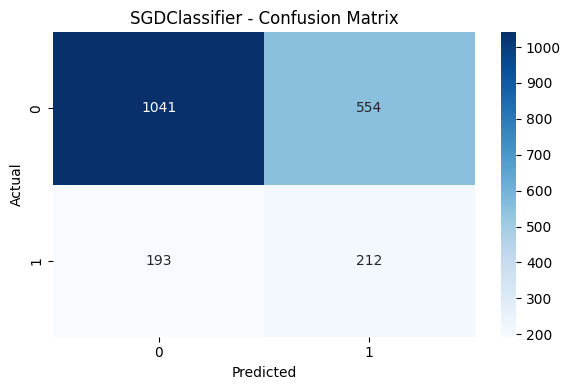

<ipython-input-33-35ec9da1724b>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='pastel')


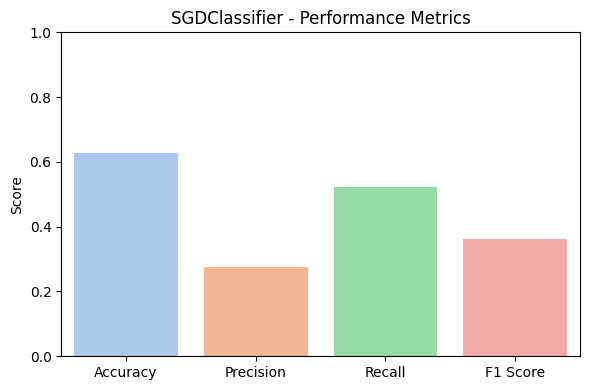

In [33]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SGDClassifier(
    loss='modified_huber',
    alpha=0.001,
    penalty='elasticnet',
    learning_rate='optimal',
    max_iter=1000,
    tol=1e-3,
    random_state=42
)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

results_file = "experiment_results.xlsx"
new_result = pd.DataFrame([{
    "Run": 18,
    "Model": "SGDClassifier",
    "Accuracy": acc,
    "Precision": prec,
    "Recall": rec,
    "F1 Score": f1
}])
if os.path.exists(results_file):
    existing = pd.read_excel(results_file)
    final_df = pd.concat([existing, new_result], ignore_index=True)
else:
    final_df = new_result
final_df.to_excel(results_file, index=False)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy: {:.3f}".format(acc))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('SGDClassifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

metrics = {'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1 Score': f1}
plt.figure(figsize=(6, 4))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='pastel')
plt.ylim(0, 1)
plt.title('SGDClassifier - Performance Metrics')
plt.ylabel('Score')
plt.tight_layout()
plt.show()


Test #19

loss= log_loss | Alpha= 0.01 | penalty=l1 | Learning Rate=invscaling

Confusion Matrix:
 [[1076  519]
 [ 165  240]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.67      0.76      1595
           1       0.32      0.59      0.41       405

    accuracy                           0.66      2000
   macro avg       0.59      0.63      0.59      2000
weighted avg       0.76      0.66      0.69      2000

Accuracy: 0.658


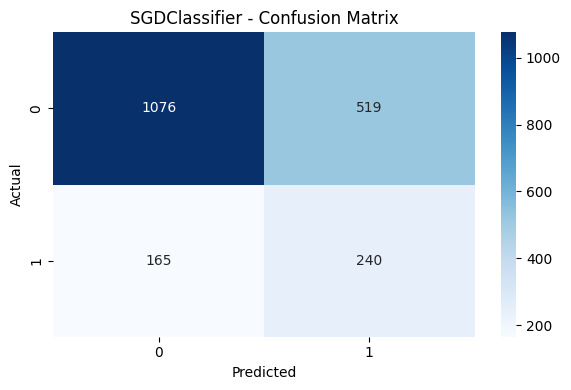

<ipython-input-35-d5845f6a1f40>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='pastel')


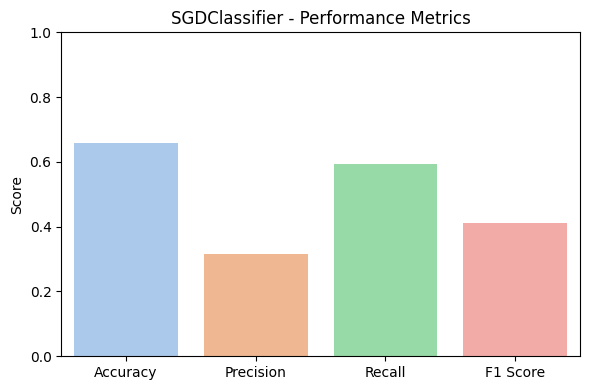

In [35]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SGDClassifier(
    loss='log_loss',
    alpha=0.01,
    penalty='l1',
    learning_rate='invscaling',
    max_iter=1000,
    eta0=0.1,
    tol=1e-3,
    random_state=42
)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

results_file = "experiment_results.xlsx"
new_result = pd.DataFrame([{
    "Run": 19,
    "Model": "SGDClassifier",
    "Accuracy": acc,
    "Precision": prec,
    "Recall": rec,
    "F1 Score": f1
}])
if os.path.exists(results_file):
    existing = pd.read_excel(results_file)
    final_df = pd.concat([existing, new_result], ignore_index=True)
else:
    final_df = new_result
final_df.to_excel(results_file, index=False)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy: {:.3f}".format(acc))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('SGDClassifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

metrics = {'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1 Score': f1}
plt.figure(figsize=(6, 4))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='pastel')
plt.ylim(0, 1)
plt.title('SGDClassifier - Performance Metrics')
plt.ylabel('Score')
plt.tight_layout()
plt.show()


Test #20

loss= log_loss | Alpha= 0.01 | penalty=elascinet | Learning Rate=adaptive

Confusion Matrix:
 [[1050  545]
 [ 154  251]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.66      0.75      1595
           1       0.32      0.62      0.42       405

    accuracy                           0.65      2000
   macro avg       0.59      0.64      0.58      2000
weighted avg       0.76      0.65      0.68      2000

Accuracy: 0.650


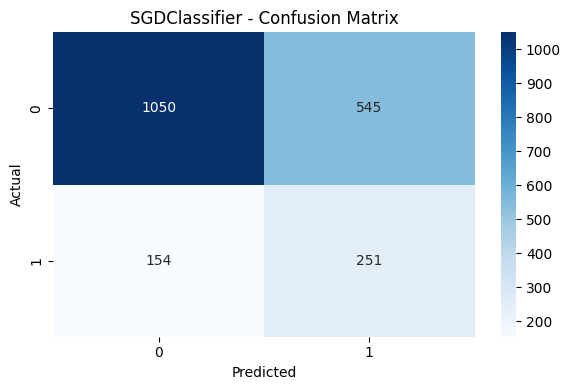

<ipython-input-40-3ad1ceea727c>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='pastel')


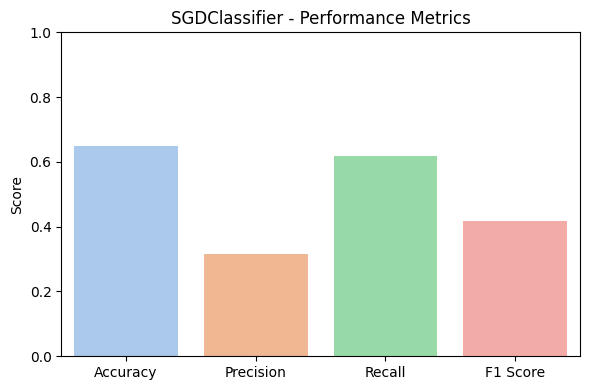

In [40]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SGDClassifier(
    loss='log_loss',
    alpha=0.01,
    penalty='elasticnet',
    learning_rate='adaptive',
    max_iter=1000,
    eta0=0.1,
    tol=1e-3,
    random_state=42
)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

results_file = "experiment_results.xlsx"
new_result = pd.DataFrame([{
    "Run": 20,
    "Model": "SGDClassifier",
    "Accuracy": acc,
    "Precision": prec,
    "Recall": rec,
    "F1 Score": f1
}])
if os.path.exists(results_file):
    existing = pd.read_excel(results_file)
    final_df = pd.concat([existing, new_result], ignore_index=True)
else:
    final_df = new_result
final_df.to_excel(results_file, index=False)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy: {:.3f}".format(acc))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('SGDClassifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

metrics = {'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1 Score': f1}
plt.figure(figsize=(6, 4))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='pastel')
plt.ylim(0, 1)
plt.title('SGDClassifier - Performance Metrics')
plt.ylabel('Score')
plt.tight_layout()
plt.show()
